In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder

In [39]:
df = pd.read_csv("titanic 2\\train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [41]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Cleaning Dataset

In [42]:
# Age, Cabin, Embarked contains null values
# Drop cabin
# fill Embarked with the highest or drop it if it is unique or fill with unknown

In [43]:
len(df["Ticket"].unique())

681

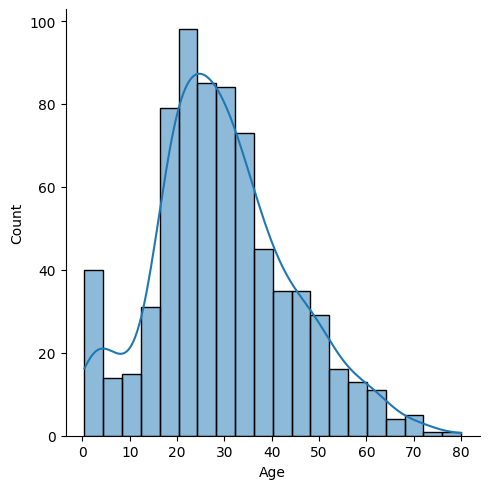

In [44]:
sns.displot(df['Age'], kde=True)
plt.show()

In [45]:
df["Age"] = df["Age"].fillna(df["Age"].median())

In [46]:
# U stands for Unknown
# df.info()
df["Embarked"] = df["Embarked"].fillna("U")

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [48]:
df = df.drop('Cabin', axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


## Trying to understand relationship between survival and the features

In [50]:
df['Age'].describe()
# df_encoded['Fare']

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [51]:
df[df['Age'] < 1]
# 804

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,S


In [52]:
df.loc[df['PassengerId'] == 804, 'Age'] = 42.0
df.loc[df['PassengerId'] == 756, 'Age'] = 67.0    
df.loc[df['PassengerId'] == 79, 'Age'] = 83.0
df.loc[df['PassengerId'] == 306, 'Age'] = 92.0    
df.loc[df['PassengerId'] == 470, 'Age'] = 75.0
df.loc[df['PassengerId'] == 645, 'Age'] = 75.0    
df.loc[df['PassengerId'] == 832, 'Age'] = 83.0    

In [53]:
df['Age'].describe()

count    891.000000
mean      29.936027
std       13.418788
min        1.000000
25%       22.000000
50%       28.000000
75%       36.000000
max       92.000000
Name: Age, dtype: float64

In [54]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [55]:
# df['Sex'].value_counts()

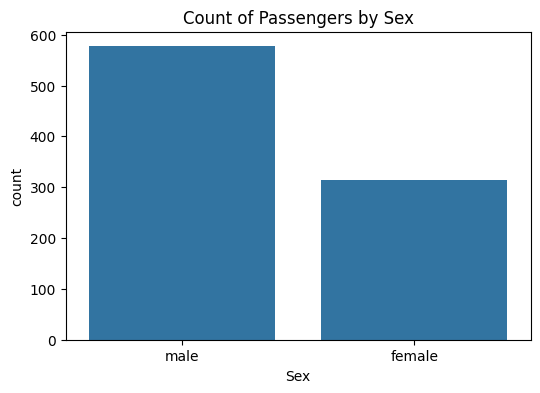

In [56]:
plt.figure(figsize=(6,4))
sns.countplot(x="Sex", data=df)
plt.title("Count of Passengers by Sex")
plt.show()

In [57]:
ct = pd.crosstab(df["Sex"], df["Survived"])
ct

Survived,0,1
Sex,,
female,81,233
male,468,109


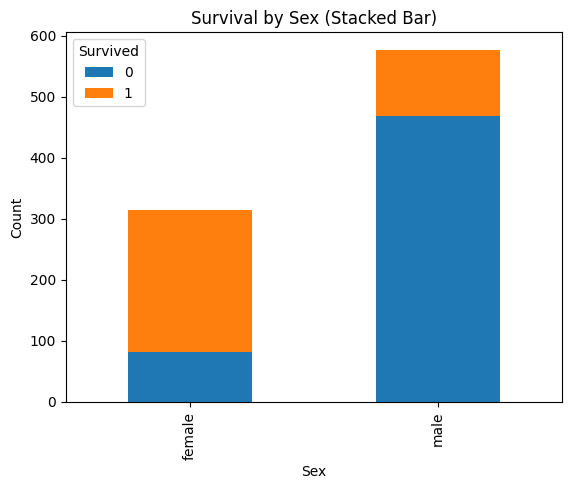

In [58]:
# Sex by survived


ct.plot(kind="bar", stacked=True)

plt.title("Survival by Sex (Stacked Bar)")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["0", "1"])
plt.show()

In [59]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
U      2
Name: count, dtype: int64

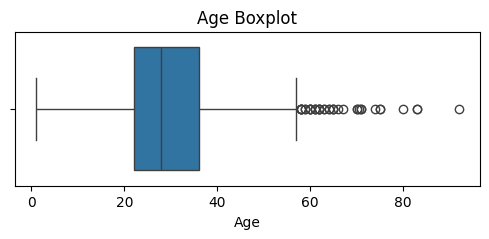

In [60]:
# THis shows the outliers in the Age column
plt.figure(figsize=(6,2))
sns.boxplot(x=df["Age"])
plt.title("Age Boxplot")
plt.show()

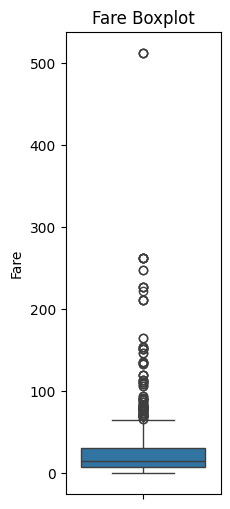

In [61]:
plt.figure(figsize=(2,6))
sns.boxplot(y=df["Fare"])
plt.title("Fare Boxplot")
plt.show()

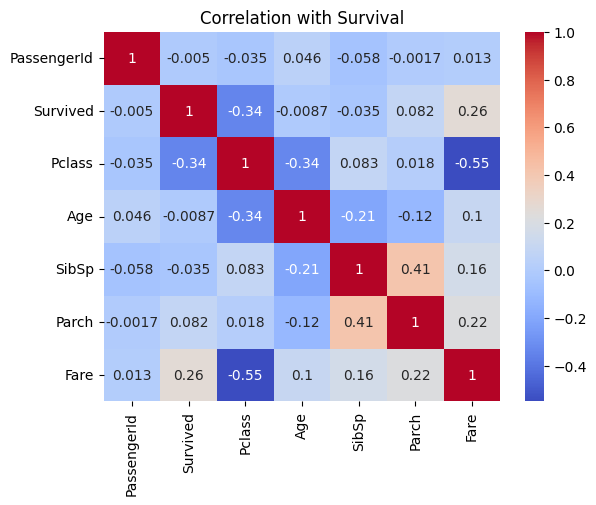

In [62]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation with Survival")
plt.show()

There are columns here that have no correlation with the survival of passengers. THey are close to zero, whuch means they have neither positive nor
negative correlations.

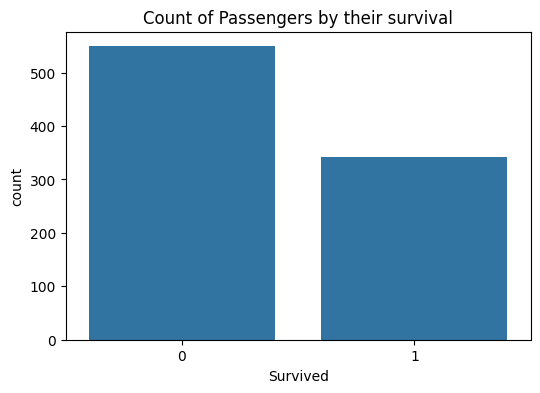

In [63]:
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", data=df)
plt.title("Count of Passengers by their survival")
plt.show()

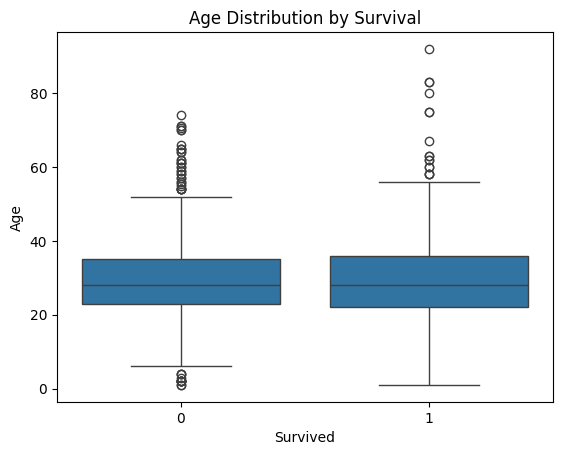

In [64]:
sns.boxplot(x="Survived", y="Age", data=df)
plt.title("Age Distribution by Survival")
plt.show()
# The mean age of those that died is around the laste 20's

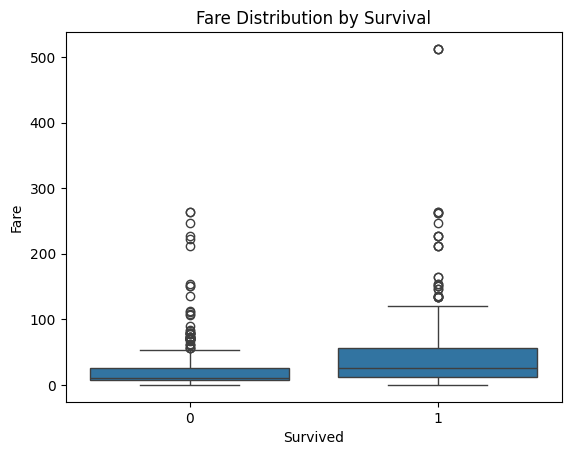

In [26]:
sns.boxplot(x="Survived", y="Fare", data=df)
plt.title("Fare Distribution by Survival")
plt.show()

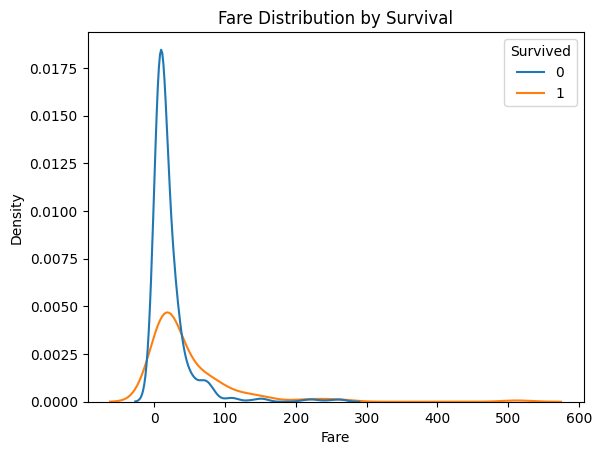

In [25]:
sns.kdeplot(data=df, x="Fare", hue="Survived")
plt.title("Fare Distribution by Survival")
plt.show()

In [65]:
# The more people that dies=d paid lesser fair. Which shows that they are the common people

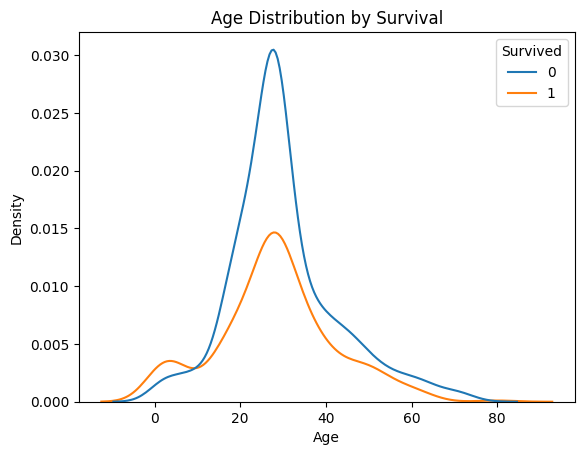

In [27]:
sns.kdeplot(data=df, x="Age", hue="Survived")
plt.title("Age Distribution by Survival")
plt.show()

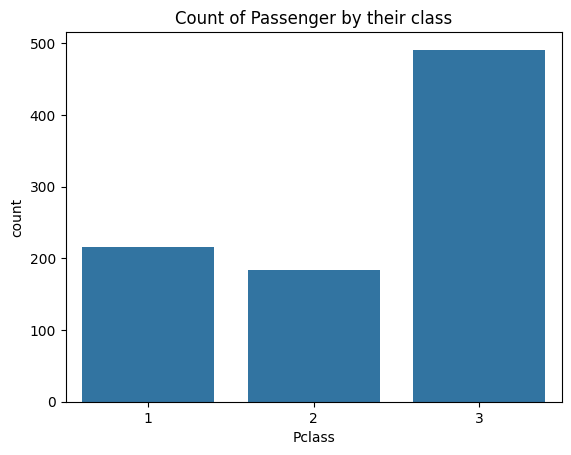

In [36]:
# Pclass by Survived
sns.countplot(x="Pclass", data=df)
plt.title("Count of Passenger by their class")
plt.show()

In [38]:
ct2 = pd.crosstab(df["Pclass"], df["Survived"])
ct2

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [66]:
# Those in the lower class, class 3 died the most and according to the ratio, they still have the highest probability of death

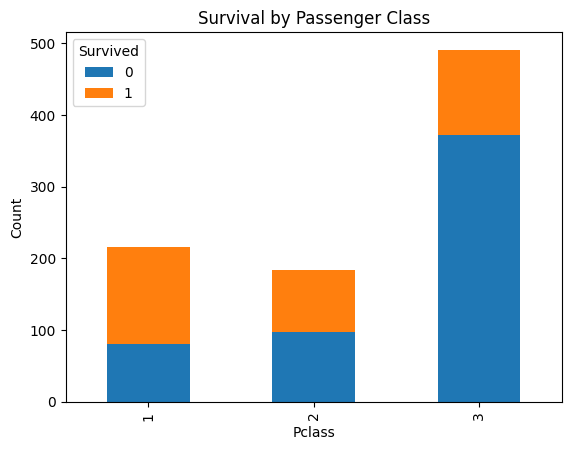

In [39]:
ct2.plot(kind="bar", stacked=True)

plt.title("Survival by Passenger Class")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["0", "1"])
plt.show()

In [40]:
df.head()
# SibSp, Parch, Embarked

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
df["Embarked"].unique()

array(['S', 'C', 'Q', 'U'], dtype=object)

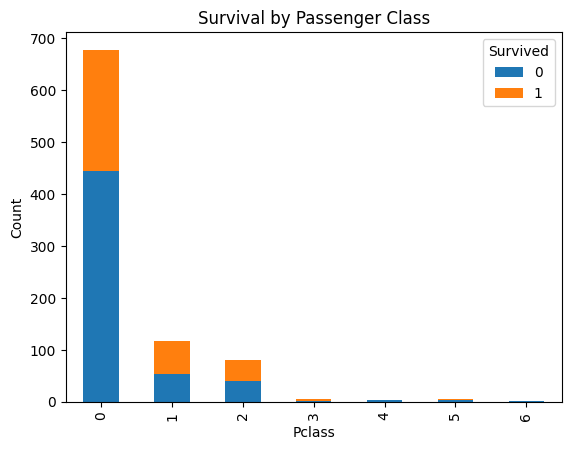

In [46]:
# ct3 = pd.crosstab(df["Parch"], df["Survived"])
# ct3

# ct3.plot(kind="bar", stacked=True)

# plt.title("Survival by Passenger Class")
# plt.xlabel("Pclass")
# plt.ylabel("Count")
# plt.legend(title="Survived", labels=["0", "1"])
# plt.show()

# SibSp and Parch also doesnt influence survived jare
# Parch is still on probability

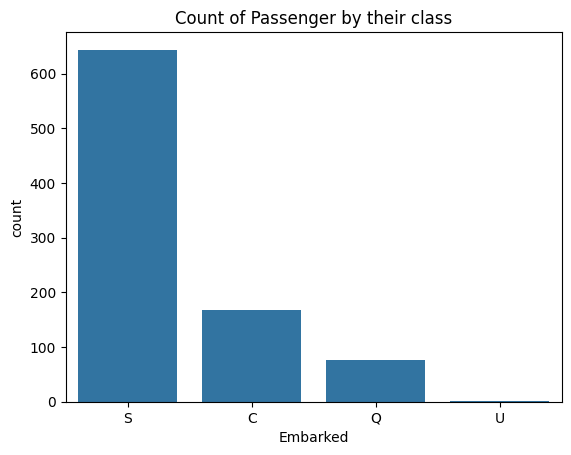

In [61]:
sns.countplot(x="Embarked", data=df)
plt.title("Count of Passenger by their class")
plt.show()

In [77]:
# Percentage value of each survived by embarked

ct4 = pd.crosstab(df["Embarked"], df["Survived"])
# ct4
# ct_norm = 
ct_norm = ct4.div(ct4.sum(axis=1), axis=0) * 100
print(ct_norm.round(2))

Survived      0       1
Embarked               
C         44.64   55.36
Q         61.04   38.96
S         66.30   33.70
U          0.00  100.00


## Categorical Encoding

In [36]:
len(df["Name"].unique())

891

In [14]:
df["Embarked"].unique()

array(['S', 'C', 'Q', 'U'], dtype=object)

In [15]:
sex_mapping = {"male": 0, "female": 1}

df["sex_encoded"] = df["Sex"].map(sex_mapping)

In [16]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2, "U": 3}

df["embarked_encoded"] = df["Embarked"].map(embarked_mapping)

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,sex_encoded,embarked_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0


In [18]:
df = df.drop(["Sex", "Embarked"], axis=1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       891 non-null    int64  
 1   Survived          891 non-null    int64  
 2   Pclass            891 non-null    int64  
 3   Name              891 non-null    object 
 4   Age               891 non-null    float64
 5   SibSp             891 non-null    int64  
 6   Parch             891 non-null    int64  
 7   Ticket            891 non-null    object 
 8   Fare              891 non-null    float64
 9   sex_encoded       891 non-null    int64  
 10  embarked_encoded  891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB


In [22]:
# Target Encoding for Ticket, check Binary Encoder
encoder = BinaryEncoder(cols=["Ticket"])
df_encoded = encoder.fit_transform(df)

In [23]:
df_encoded.head()
# plot graphs according to survived and features

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket_0,Ticket_1,Ticket_2,Ticket_3,Ticket_4,Ticket_5,Ticket_6,Ticket_7,Ticket_8,Ticket_9,Fare,sex_encoded,embarked_encoded
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,0,0,0,0,0,0,0,0,0,1,7.2500,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,0,0,0,0,0,0,0,0,1,0,71.2833,1,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,0,0,0,0,0,0,0,0,1,1,7.9250,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,0,0,0,0,0,0,0,1,0,0,53.1000,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,0,0,0,0,0,0,0,1,0,1,8.0500,0,0


In [153]:
# df_encoded.drop('Embarked', axis=1)
# df_encoded.head()

In [24]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       891 non-null    int64  
 1   Survived          891 non-null    int64  
 2   Pclass            891 non-null    int64  
 3   Name              891 non-null    object 
 4   Age               891 non-null    float64
 5   SibSp             891 non-null    int64  
 6   Parch             891 non-null    int64  
 7   Ticket_0          891 non-null    int64  
 8   Ticket_1          891 non-null    int64  
 9   Ticket_2          891 non-null    int64  
 10  Ticket_3          891 non-null    int64  
 11  Ticket_4          891 non-null    int64  
 12  Ticket_5          891 non-null    int64  
 13  Ticket_6          891 non-null    int64  
 14  Ticket_7          891 non-null    int64  
 15  Ticket_8          891 non-null    int64  
 16  Ticket_9          891 non-null    int64  
 1

### Based on the Analysis:
SibSp and Parch does not seem to influence survived as much as the other features

The male has highest percentage among the dead

The death rate is more among people with lesser pay and also staying in the lower cabins

The mean age of people that didn't survived are in their late 20's

Higher percentage of passengers embarked from Southampton (S). 